In [22]:
import nltk
import string
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sms = pd.read_csv('SMSSpamCollection', sep='\t', names=["label","message"])

In [4]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nishant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# EDA

In [7]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
sms.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
#To calculate length of each message, add col length 
sms['length'] = sms['message'].apply(len)

In [14]:
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


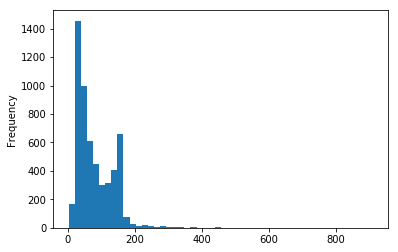

In [19]:
sms['length'].plot(bins=50, kind='hist')

In [20]:
sms.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002623CFD0940>,
      dtype=object)

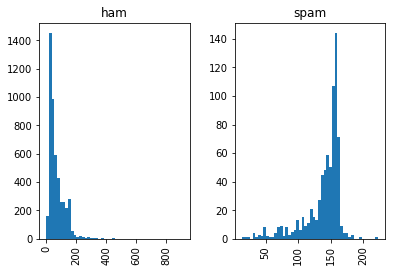

In [21]:
sms.hist(column='length', by='label', bins=50)

# Text Preprocessing - Tokenization

In [26]:
def text_process(message):
    #Check for Punctuation
    output = [character for character in message if character not in string.punctuation]
    output = ''.join(output)
    #Check for StopWords
    return [word for word in output.split() if word.lower() not in stopwords.words('english')]



In [27]:
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
sms['message'].head(10).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: message, dtype: object

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
#Bag of Words
bow_obj = CountVectorizer(analyzer=text_process).fit(sms['message'])

In [32]:
len(bow_obj.vocabulary_)

11425

In [35]:
#Apply CountVectorizer obj over the entire dataset (sms)
sms_bow = bow_obj.transform(sms['message'])

In [36]:
sms_bow.shape

(5572, 11425)

In [40]:
#Applying TF-IDF i.e. Term Frequency - Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_obj = TfidfTransformer().fit(sms_bow)
sms_tfidf = tfidf_obj.transform(sms_bow)
print(sms_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

# Model Creation - NaiveBayes Algo

In [41]:
from sklearn.naive_bayes import MultinomialNB
spam_detect = MultinomialNB().fit(sms_tfidf, sms['label'])

In [42]:
#Score
spam_detect.score(sms_tfidf, sms['label'])

0.9793610911701364

In [43]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(sms['label'], spam_detect.predict(sms_tfidf))
cm

array([[4825,    0],
       [ 115,  632]], dtype=int64)

In [44]:
#Create train-test-split
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sms['message'],
                                                   sms['label'],
                                                   test_size=0.2,
                                                   random_state=0)

In [45]:
# ML Data Pipeline
from sklearn.pipeline import Pipeline
pipe_obj = Pipeline([
    ('how',CountVectorizer(analyzer=text_process)), #Strings to tokens with integer count
    ('tfidf', TfidfTransformer()), # integer counts to weighted tf-idf scores
    ('classifier',MultinomialNB()), #train on TF-IDF vecors with NB Classifier
    
])

In [46]:
pipe_obj.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('how', CountVectorizer(analyzer=<function text_process at 0x000002623ED02378>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [47]:
pipe_obj.score(x_train, y_train)

0.9771146511106125

In [48]:
pipe_obj.score(x_test, y_test)

0.9659192825112107

# Model Score 

Train Score : 97.71 %

Test Score : 96.59 %